## Using because prev notebook is convoluted

In [8]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [11]:
df_business = pd.read_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP_FINAL_PROJECT_GIT\CS554_NLP_Final_Project\datasets\uncleaned_datasets\business.parquet")
df_reviews = pd.read_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP_FINAL_PROJECT_GIT\CS554_NLP_Final_Project\datasets\uncleaned_datasets\reviews_2020.parquet")
df_users = pd.read_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP_FINAL_PROJECT_GIT\CS554_NLP_Final_Project\datasets\uncleaned_datasets\user.parquet")

print(df_business.shape)
print(df_reviews.shape)
print(df_users.shape)

(150346, 14)
(1204411, 9)
(1987897, 22)


#### checking to see if data is loaded correctly

In [4]:
# for reviews, data should be date > 2020 and city is only philly
df_reviews["date"] = pd.to_datetime(df_reviews["date"])
df_reviews = df_reviews[df_reviews["date"] >= "2020-01-01"]
print(df_reviews.shape)
top_cities = ["Philadelphia"]
df_business_top5 = df_business[df_business['city'].isin(top_cities)]
print(df_business_top5.shape)

(1204411, 9)
(14569, 14)


In [5]:
valid_business_ids = set(df_business_top5['business_id'])
df_reviews_top5 = df_reviews[df_reviews['business_id'].isin(valid_business_ids)]
df_reviews_top5.shape

(105547, 9)

In [ ]:
valid_user_ids = set(df_reviews_top5['user_id'])
df_user_top5 = df_users[df_users['user_id'].isin(valid_user_ids)]
df_user_top5.shape

(51929, 22)

In [12]:
df_reviews_top5.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP_FINAL_PROJECT_GIT\CS554_NLP_Final_Project\datasets\cleaned_datasets\reviews_philly.parquet")
df_user_top5.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP_FINAL_PROJECT_GIT\CS554_NLP_Final_Project\datasets\cleaned_datasets\users_philly.parquet")
df_business_top5.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP_FINAL_PROJECT_GIT\CS554_NLP_Final_Project\datasets\cleaned_datasets\business_philly.parquet")

In [13]:
# merging into one big dataset
df_merged = df_reviews_top5.merge(
    df_business_top5,
    on="business_id",
    how="inner",
    suffixes=("_rev", "_biz")
)

df_merged = df_merged.merge(
    df_user_top5,
    on="user_id",
    how="left",
    suffixes=("", "_user")  
)

In [14]:
df_merged.to_parquet(r"C:\Users\rubak\OneDrive\Documents\NLP_FINAL_PROJECT_GIT\CS554_NLP_Final_Project\datasets\cleaned_datasets\final_dataset_philly.parquet")

### prelim analysis

In [15]:
# user review stars:
df_merged["stars_rev"].value_counts()

stars_rev
5    56330
1    17875
4    16516
3     8195
2     6631
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

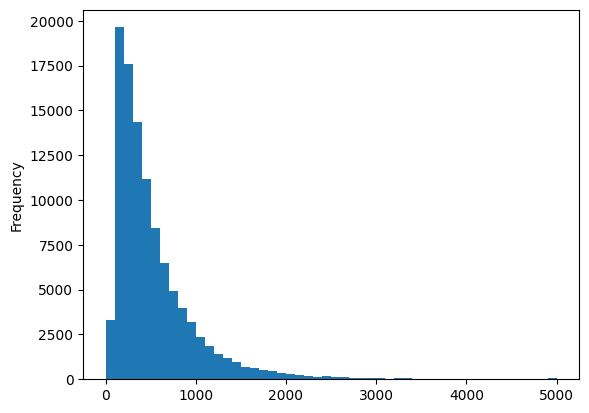

In [16]:
df_merged["text_length"] = df_merged["text"].str.len()
df_merged["text_length"].describe()
df_merged["text_length"].plot(kind="hist", bins=50)


<Axes: xlabel='date'>

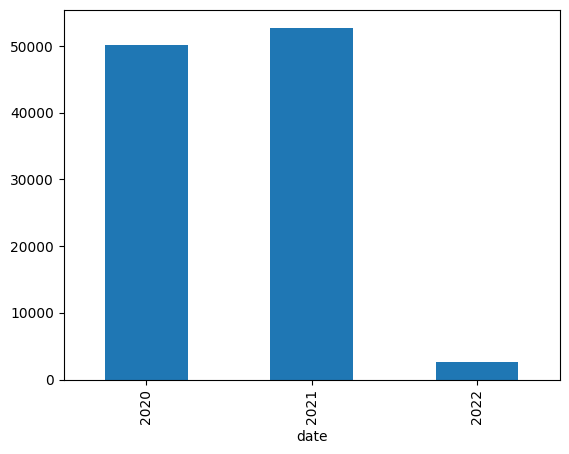

In [17]:
df_merged["date"].dt.year.value_counts().sort_index().plot(kind="bar")


C:\Users\rubak\AppData\Local\Temp\ipykernel_28888\4167233556.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_merged.set_index("date").resample("M")["review_id"].count().plot()


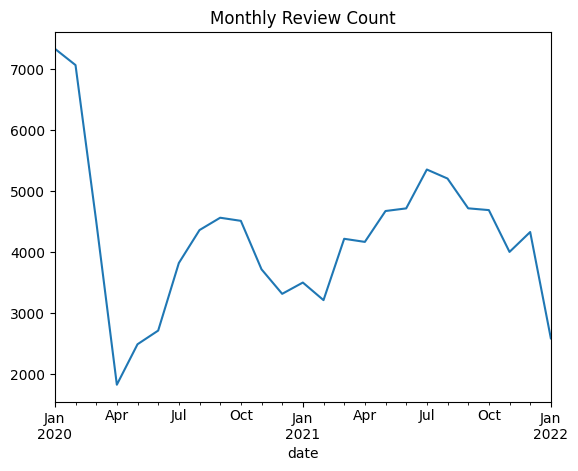

In [18]:
import matplotlib.pyplot as plt
df_merged.set_index("date").resample("M")["review_id"].count().plot()
plt.title("Monthly Review Count")
plt.show()


In [21]:
top_businesses = (
    df_merged
    .groupby(["business_id", "name"], as_index=False)["review_id"]
    .count()
    .rename(columns={"review_id": "num_reviews"})
    .sort_values("num_reviews", ascending=False)
    .head(10)
)



In [22]:
top_businesses

,business_id,name,num_reviews
8978,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,501
4030,RQAF6a0akMiot5lZZnMNNw,Dalessandro’s Steaks & Hoagies,493
6695,j-qtdD55OLfSqfsWuQTDJg,Parc,400
8491,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,343
1594,AGlh4ZDv6jnoiYfz7At9mw,Dim Sum Garden,342
1100,6ajnOk0GcY9xbb5Ocaw8Gw,Barbuzzo,291
4358,TunmRrfZb7bt53T6HJi4UQ,Bleu Sushi,289
3755,PP3BBaVxZLcJU54uP_wL6Q,Pat's King of Steaks,285
6664,iksVwRfpWymIUUFqw0tXpw,Chubby Cattle,278
2995,K7KHmHzxNwzqiijSJeKe_A,Cafe La Maude,272
